### Chapter 9 Select Applied Solutions

In [ ]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
import pandas as pd

from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
roc_curve = RocCurveDisplay.from_estimator

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



### Problem 5 

In [2]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

Text(0, 0.5, 'X2')

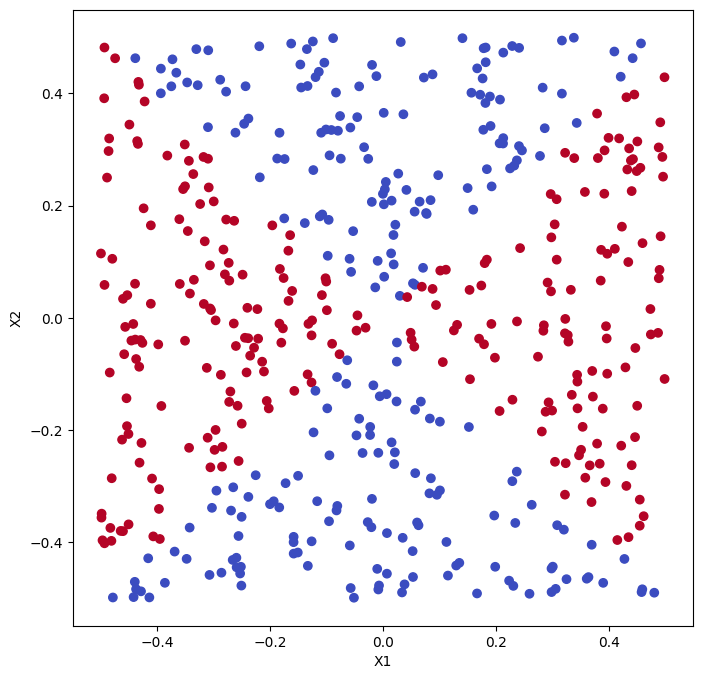

In [3]:
fig, ax = subplots(figsize = (8,8))
ax.scatter(x1, x2, c =y, cmap = cm.coolwarm )
ax.set_xlabel("X1")
ax.set_ylabel("X2")


In [4]:
df = pd.DataFrame({"Y": y, 
                   "X1": x1, 
                   "X2": x2})
X = df[["X1", "X2"]]
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.692711
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:               0.0005256
Time:                        11:04:45   Log-Likelihood:                -346.36
converged:                       True   LL-Null:                       -346.54
Covariance Type:            nonrobust   LLR p-value:                    0.8335
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0221      0.090      0.246      0.805      -0.154       0.198
X1            -0.1662      0.

(-0.55, 0.55)

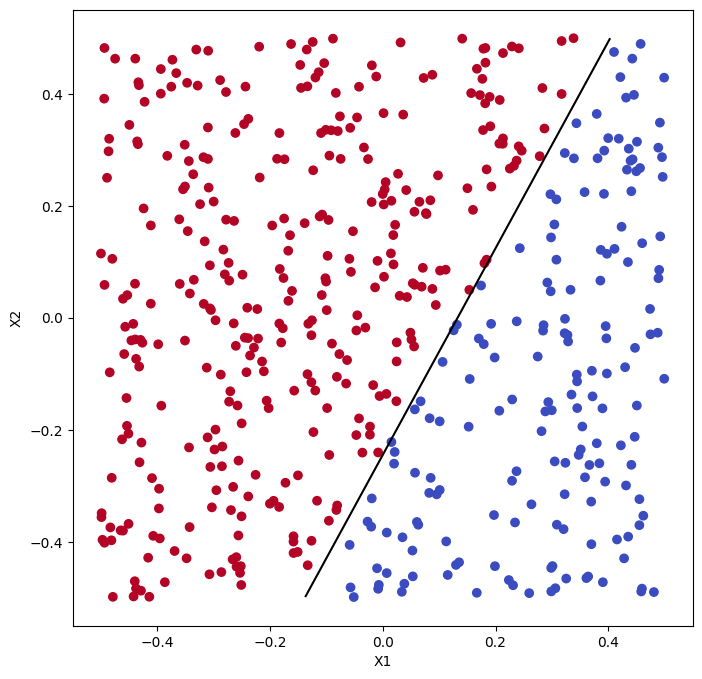

In [5]:
logit_train_pred = result.predict(X)
df['Training Labels'] = np.full(len(x1), False)
df.loc[logit_train_pred>0.5, 'Training Labels'] = True 


x1_range = np.linspace(x1.min(), x1.max(), 200)
x2_range = np.linspace(x2.min(), x2.max(), 200)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = pd.DataFrame({'x1': xx1.ravel(), 'x2': xx2.ravel()})
grid_const = sm.add_constant(grid)
pred_probs = result.predict(grid_const).values.reshape(xx1.shape)



fig, ax = subplots(figsize = (8,8))
ax.contour(xx1, xx2, pred_probs, levels=[0.5], colors='black')
ax.scatter(x1, x2, c =df["Training Labels"], cmap = cm.coolwarm )
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_ylim([-0.55, 0.55])
ax.set_xlim([-0.55, 0.55])


In [6]:
df["logx1"] = np.log(x1**2)
df['x2^2'] = x2**2 

X_new = df.drop(columns = ["Y", 'Training Labels'])


X_new = sm.add_constant(X_new)
model2 = sm.Logit(df["Y"], X_new)
result2 = model2.fit() 
result2.summary()


Optimization terminated successfully.
         Current function value: 0.198476
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.7136
Time:                        11:04:45   Log-Likelihood:                -99.238
converged:                       True   LL-Null:                       -346.54
Covariance Type:            nonrobust   LLR p-value:                9.865e-106
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1520      1.147      9.722      0.000       8.904      13.400
X1            -0.8723      0.649     -1.344      0.179      -2.145       0.400
X2            -0.1851      0.638     -0.290      0.772      -1.435       1.065
logx1          2.2286      0.244      9.145      0.000       1.751       2.706
x2^2         -49.9882      5.290     -9.450      0.000     -60.356     -39.620
==============================================================================
"""

C:\Users\campz\AppData\Local\Temp\ipykernel_21616\4244112664.py:5: RuntimeWarning: invalid value encountered in log
  grid2 = pd.DataFrame({'x1': xx1.ravel(), 'x2': xx2.ravel(), 'logx1': (np.log(xx1)).ravel(), 'x2^2': (xx2**2).ravel()})


Text(0.5, 1.0, 'Only showing the x1, x2 data not the full data set')

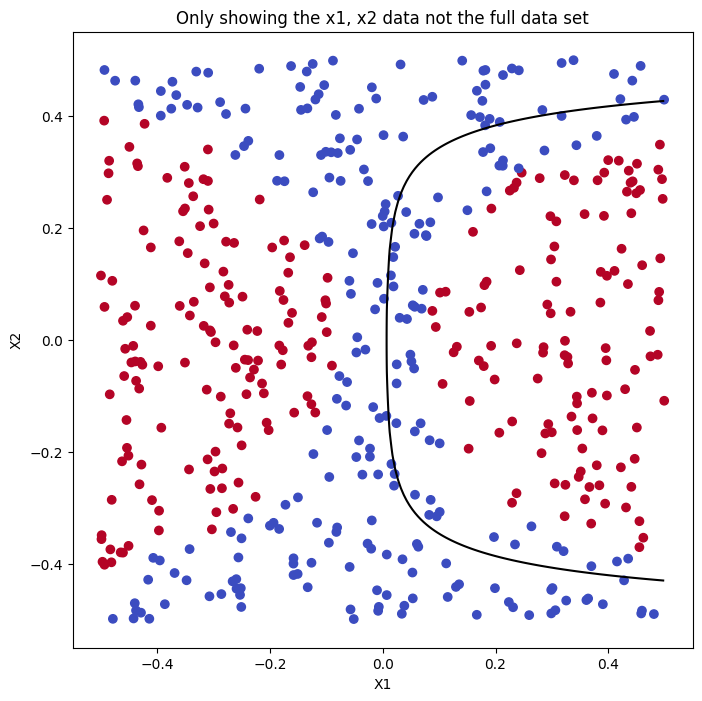

In [7]:
pred = result2.predict(X_new)
df['TL2'] = np.full(len(x1), False)
df.loc[pred>0.5, 'TL2'] = True 

grid2 = pd.DataFrame({'x1': xx1.ravel(), 'x2': xx2.ravel(), 'logx1': (np.log(xx1)).ravel(), 'x2^2': (xx2**2).ravel()})
grid_const2 = sm.add_constant(grid2)
pred_probs2 = result2.predict(grid_const2).values.reshape(xx1.shape)



fig, ax = subplots(figsize = (8,8))
ax.contour(xx1, xx2, pred_probs2, levels=[0.5], colors='black')
ax.scatter(x1, x2, c =df["TL2"], cmap = cm.coolwarm )
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_ylim([-0.55, 0.55])
ax.set_xlim([-0.55, 0.55])
ax.set_title("Only showing the x1, x2 data not the full data set")

In [8]:
X = X.drop(columns="const")

c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


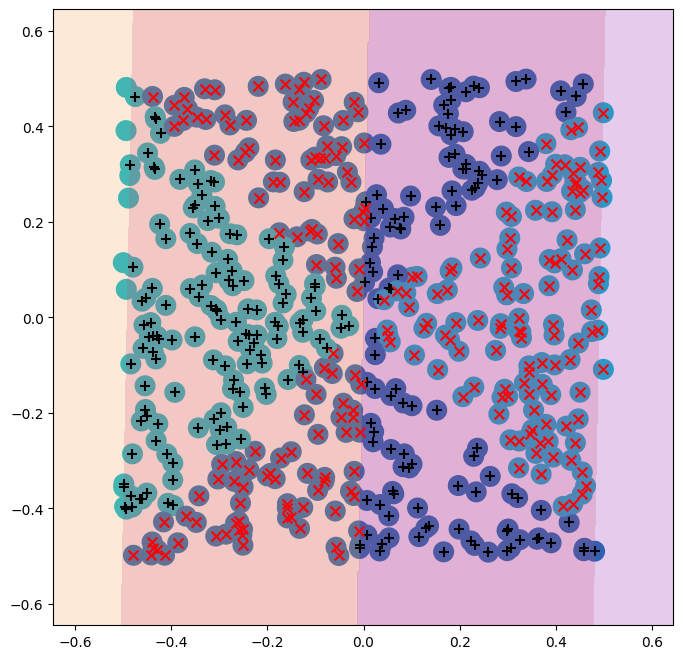

In [12]:
svm_basic = SVC(C = 6, kernel ='linear')
svm_basic.fit(X, y)
svm_pred = svm_basic.predict(X)


fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         df['Y'],
         svm_basic,
         ax=ax)

c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


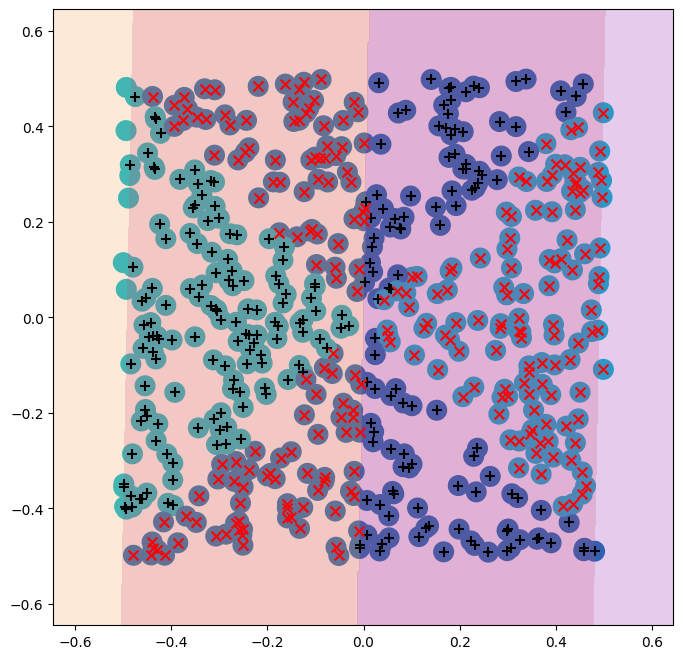

In [15]:
svm_nonlin = SVC(C = 6, kernel ='rbf', gamma = 100)
svm_nonlin.fit(X, y)
svm_pred = svm_basic.predict(X)


fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         df['Y'],
         svm_basic,
         ax=ax)

### Problem 7 

Predict whether a given car gets high or low gas milage based on Auto 

In [93]:
%reset

In [151]:
Auto = load_data("Auto")
Auto["med_mile"] = (Auto["mpg"] > np.median(Auto["mpg"])).astype(int)
Auto = Auto.drop(columns= 'mpg')
Auto

,cylinders,displacement,horsepower,weight,acceleration,year,origin,med_mile
name,,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,8,304.0,150,3433,12.0,70,1,0
ford torino,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...
ford mustang gl,4,140.0,86,2790,15.6,82,1,1
vw pickup,4,97.0,52,2130,24.6,82,2,1
dodge rampage,4,135.0,84,2295,11.6,82,1,1


In [ ]:
X = Auto.drop(columns = "med_mile")
Y = Auto['med_mile']


numeric_feat = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
categorical_feat = ['origin']
scaler = StandardScaler()


preprocessor = ColumnTransformer([('scale', scaler, numeric_feat), ('encode', OneHotEncoder(handle_unknown='ignore',drop = 'first'), categorical_feat)])


(X_train, 
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Y,
                                test_size=0.25,
                                random_state=0)

In [153]:
svm_linear = SVC(C =1, kernel= 'linear')
c_param = {"svm__C": np.linspace(0.001, 100, 20)}
pipe = Pipeline(steps = [('pre',  preprocessor), ("svm",  svm_linear)])
svm_grid = skm.GridSearchCV(pipe, 
                            param_grid=c_param, 
                            cv = 5, 
                            refit = True, 
                            scoring = 'accuracy')


try:
    svm_grid.fit(X_train, y_train)
except ValueError as e:
    print("Error:", e)
    print("X_train columns:", X_train.columns.tolist())


print("Best C:", svm_grid.best_params_)
print("Best accuracy:", svm_grid.best_score_)
print("All scores:", svm_grid.cv_results_['mean_test_score'])



Best C: {'svm__C': 10.527210526315788}
Best accuracy: 0.9489772063120983
All scores: [0.79251899 0.94558738 0.94897721 0.94897721 0.94897721 0.94897721
 0.94558738 0.94219755 0.93880771 0.94219755 0.93880771 0.93880771
 0.93880771 0.93880771 0.93880771 0.93880771 0.93880771 0.93880771
 0.93880771 0.93880771]


c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\ISLP\svm.py:136: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_ = (2 * (Y[svm.support_] == svm.classes_[1]) - 1)


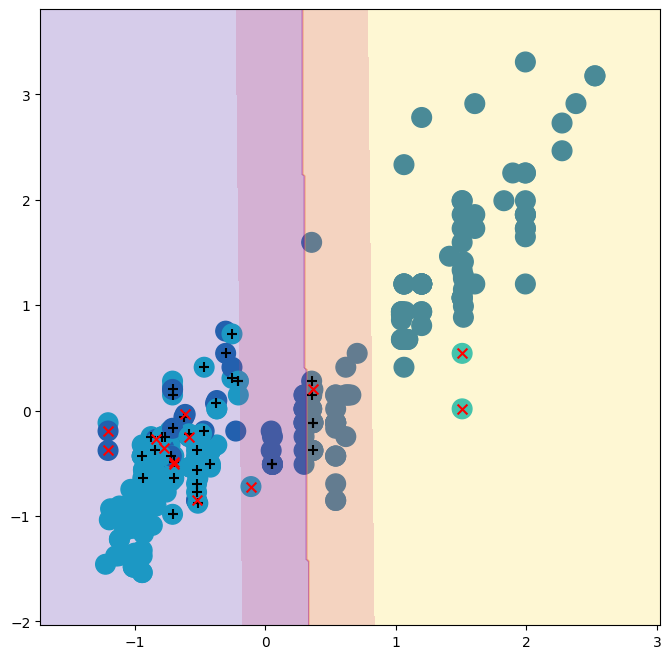

In [154]:
best_svm = svm_grid.best_estimator_
# Extract from pipeline
preprocessor = best_svm.named_steps['pre']
svm_model = best_svm.named_steps['svm']

# Transform full X_train using only the preprocessor
X_train_transformed = preprocessor.transform(X_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train_transformed, y_train, svm_model, features=(1, 2), ax=ax)


In [155]:
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)


Truth,0,1
Predicted,,
0,38,6
1,10,44


In [156]:
error = 1 - accuracy_score(y_test, y_hat_test)
print(f"Classification error: {error:.4f}", np.round(mean_squared_error(y_test, y_hat_test),4))

Classification error: 0.1633 0.1633


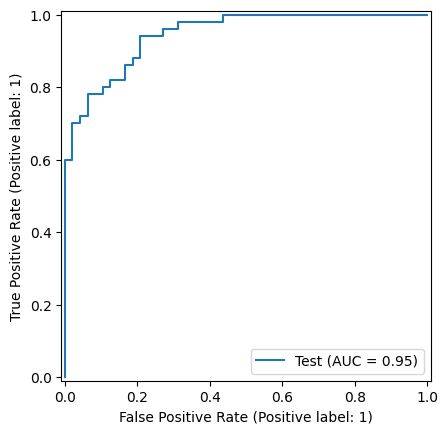

In [157]:
roc_curve(best_svm,
          X_test,
          y_test,
          name='Test',
          color='b',
          ax=ax).plot()

In [158]:
svm_nonlinear = SVC(C =1, kernel= 'rbf', gamma = 1)
gc_param = {"svm__C": np.linspace(0.001, 100, 20), "svm__gamma": np.linspace(0.001, 10, 10)}
pipe2 = Pipeline(steps = [('pre',  preprocessor), ("svm",  svm_nonlinear)])
svm_nonlingrid = skm.GridSearchCV(pipe2, 
                            param_grid=gc_param, 
                            cv = 5, 
                            refit = True, 
                            scoring = 'accuracy')


try:
    svm_nonlingrid.fit(X_train, y_train)
except ValueError as e:
    print("Error:", e)
    print("X_train columns:", X_train.columns.tolist())


print("Best C:", svm_nonlingrid.best_params_)
print("Best accuracy:", svm_nonlingrid.best_score_)

Best C: {'svm__C': 5.264105263157894, 'svm__gamma': 1.1119999999999999}
Best accuracy: 0.932144944476914


c:\Users\campz\anaconda3\envs\ISLP\Lib\site-packages\ISLP\svm.py:136: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_ = (2 * (Y[svm.support_] == svm.classes_[1]) - 1)


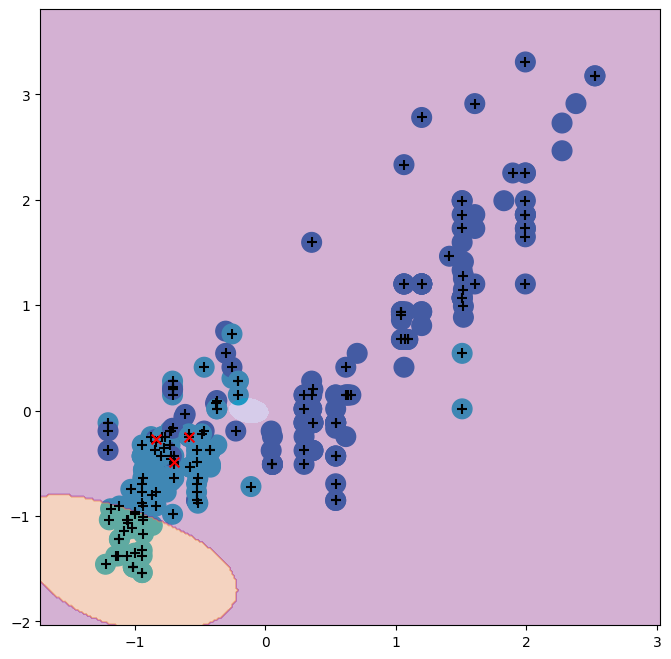

In [159]:
best_svm_non = svm_nonlingrid.best_estimator_
# Extract from pipeline
preprocessor = best_svm_non.named_steps['pre']
svm_model_non = best_svm_non.named_steps['svm']

# Transform full X_train using only the preprocessor
X_train_transformed = preprocessor.transform(X_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train_transformed, y_train, svm_model_non, features=(1, 2), ax=ax)

In [160]:
y_hat_test_non = best_svm_non.predict(X_test)
confusion_table(y_hat_test_non, y_test)

Truth,0,1
Predicted,,
0,42,7
1,6,43


In [161]:
error = 1 - accuracy_score(y_test, y_hat_test_non)
print(f"Classification error: {error:.4f}", np.round(mean_squared_error(y_test, y_hat_test_non),4))

Classification error: 0.1327 0.1327


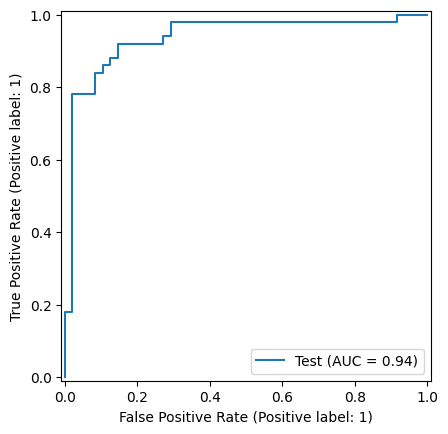

In [162]:
roc_curve(best_svm_non,
          X_test,
          y_test,
          name='Test',
          color='b',
          ax=ax).plot()

### Problem 8

In [95]:
OJ = load_data("OJ")

Y = OJ["Purchase"].astype('category').cat.codes
X = OJ.drop(columns=["Purchase", 'Store7'])


(X_train, 
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Y,
                                train_size=800,
                                random_state=0, 
                                shuffle=True)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop= True)
y_test = y_test.reset_index(drop=True)
X_train.shape

(800, 16)

In [88]:
numeric_features = ['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
                    'LoyalCH', 'SalePriceMM', 'SalePriceCH', 
                    'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff']

categorical_features = ['StoreID', 'STORE', 'WeekofPurchase', 'SpecialCH', 'SpecialMM']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
svm_model = SVC(kernel='linear', C=0.01)

# Create pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', svm_model)
])

# Fit the pipeline
svm = pipe.fit(X_train, y_train)

In [89]:
num_support_points = len(svm_model.support_)
print("Number of support vectors:", num_support_points)
print("Support vectors per class:", svm_model.n_support_)

Number of support vectors: 436
Support vectors per class: [220 216]


In [90]:
test_preds = svm.predict(X_test)
print(f"Classification error(%): {mean_squared_error(test_preds, y_test)*100:.4f}")

Classification error(%): 17.7778


In [91]:
confusion_table(test_preds, y_test)


Truth,0,1
Predicted,,
0,131,26
1,22,91


In [92]:
param = {"svm__C": np.linspace(0.01, 10, 20)}

svm_lingrid = skm.GridSearchCV(pipe, 
                            param_grid=param, 
                            cv = 5, 
                            refit = True, 
                            scoring = 'accuracy')

svm_lingrid.fit(X_train, y_train)
print("Best C:", svm_lingrid.best_params_)
print("Best accuracy:", svm_lingrid.best_score_)

Best C: {'svm__C': 0.01}
Best accuracy: 0.83125


In [93]:
best_lin = svm_lingrid.best_estimator_
test_preds = best_lin.predict(X_test)
print(f"Classification error(%): {mean_squared_error(test_preds, y_test)*100:.4f}")

Classification error(%): 17.7778


In [85]:
confusion_table(test_preds, y_test)

Truth,0,1
Predicted,,
0,131,26
1,22,91


Radial Kernel

In [111]:
svm_nonlin = SVC(C = 1, kernel = 'rbf')
param2 = {"svm_non__C": np.linspace(0.01, 10, 20), "svm_non__gamma": np.linspace(0.01, 10, 10) }

pipe2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm_non', svm_nonlin)
])

svm_nonlin = skm.GridSearchCV(pipe2, 
                            param_grid=param2, 
                            cv = 5, 
                            refit = True, 
                            scoring = 'accuracy')

svm_nonlin.fit(X_train, y_train)
print("Best C:", svm_nonlin.best_params_)
print("Best accuracy:", svm_nonlin.best_score_)

Best C: {'svm_non__C': 2.113157894736842, 'svm_non__gamma': 0.01}
Best accuracy: 0.8387499999999999


In [112]:
best_nonlin = svm_nonlin.best_estimator_
test_preds = best_nonlin.predict(X_test)
print(f"Classification error(%): {mean_squared_error(test_preds, y_test)*100:.4f}")

Classification error(%): 18.1481


In [113]:
confusion_table(test_preds, y_test)

Truth,0,1
Predicted,,
0,130,26
1,23,91


In [114]:
svm_poly = SVC(C = 1, kernel = 'poly', degree = 2)
param3 = {"svm_poly__C": np.linspace(0.01, 10, 20)}

pipe3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm_poly', svm_poly)
])

svm_pol = skm.GridSearchCV(pipe3, 
                            param_grid=param3, 
                            cv = 5, 
                            refit = True, 
                            scoring = 'accuracy')

svm_pol.fit(X_train, y_train)
print("Best C:", svm_pol.best_params_)
print("Best accuracy:", svm_pol.best_score_)

Best C: {'svm_poly__C': 7.371052631578948}
Best accuracy: 0.8125000000000002


In [115]:
best_poly = svm_pol.best_estimator_
test_preds = best_poly.predict(X_test)
print(f"Classification error(%): {mean_squared_error(test_preds, y_test)*100:.4f}")

Classification error(%): 18.8889


In [116]:
confusion_table(test_preds, y_test)

Truth,0,1
Predicted,,
0,133,31
1,20,86
